In [1]:
# download initial libraries needed and dependencies

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import geojson #library for handling geoJSON files

import geopandas as gpd #pandas and geoJSON files
import descartes

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# import the library we use to open URLs
import urllib.request

print('Libraries imported.')

Libraries imported.


In [2]:
#import Boston, MA geoJSON
#https://opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0.geojson

boston = gpd.read_file("https://opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0.geojson")
boston

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.32610, -71.10503 42.326..."
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.09050 42.335..."
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33673, -71.09832 42.337..."
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34878, -71.06663 42.348..."
5,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,"POLYGON ((-71.05838 42.34983, -71.05834 42.349..."
6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.05791 42.35238, -71.05811 42.352..."
7,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((-71.05200 42.36884, -71.05219 42.368..."
8,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,"POLYGON ((-71.09646 42.29323, -71.09633 42.293..."
9,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569,"POLYGON ((-71.06834 42.34775, -71.06913 42.347..."


In [3]:
#import parks geoJSON
#downloaded geoJSON for local import here: https://data.boston.gov/dataset/open-space
# file name: Open_Space.zip

zipfile = "zip:///Users/Alexandra/Downloads/Open_Space.zip"
parks = gpd.read_file(zipfile)
parks

,OBJECTID,SITE_NAME,OWNERSHIP,PROTECTION,TYPECODE,DISTRICT,ACRES,ADDRESS,ZonAgg,TypeLong,OS_Own_Jur,OS_Mngmnt,POS,PA,ALT_NAME,AgncyJuris,Shape_STArea__,Shape_STLength__,ShapeSTArea,ShapeSTLength,PARK_ID,REGION,geometry
0,7819,Wilson Park,City of Boston,,1,Allston-Brighton,0.097176,Off 1686 Commonwealth Ave.,Open Space District,"Malls, Squares & Plazas",NULL,,N,X,,PWD,0,0,4.233047e+03,256.730008,,PARK_Maintenance_Region 4,"POLYGON ((-71.14584 42.34092, -71.14581 42.340..."
1,7820,Nickerson Field,Private,,3,Allston-Brighton,6.345595,,Institutional District,"Parks, Playgrounds & Athletic Fields",NULL,,N,N,Boston University Field,,0,0,2.764190e+05,2104.702611,,INFO_Reallocation From Dept,"POLYGON ((-71.11844 42.35284, -71.11821 42.353..."
2,7821,Hooker-Sorrento Street Playground,City of Boston,A97,3,Allston-Brighton,1.005378,120 Hooker Str.,Open Space District,"Parks, Playgrounds & Athletic Fields",BPRD,,X,X,,,0,0,4.373735e+04,852.844112,156,PARK_Maintenance_Region 4,"POLYGON ((-71.12518 42.35922, -71.12504 42.359..."
3,7822,Smith Playground,City of Boston,A97,3,Allston-Brighton,14.797712,235 Western Ave.,Open Space District,"Parks, Playgrounds & Athletic Fields",BPRD,,X,X,,,0,0,6.544575e+05,3624.893621,284,PARK_Maintenance_Region 4,"POLYGON ((-71.13110 42.36318, -71.12997 42.365..."
4,7823,Fern Square,City of Boston,A97,1,Allston-Brighton,0.040543,Opposite 101 Franklin Str.,Open Space District,"Malls, Squares & Plazas",BPRD,,X,X,"James F. Collins Square, Franklin Square",,0,0,1.938695e+03,207.320531,115,PARK_Maintenance_Region 4,"POLYGON ((-71.13341 42.35948, -71.13324 42.359..."
5,7824,Ringer Playground,City of Boston,A97,3,Allston-Brighton,10.255855,,Open Space District,"Parks, Playgrounds & Athletic Fields",BPRD,,X,X,,,0,0,4.470313e+05,3765.829546,259,PARK_Maintenance_Region 4,"POLYGON ((-71.13648 42.35107, -71.13642 42.351..."
6,7825,Kennedy Rock,Private,,6,Allston-Brighton,2.210543,,Conservation Protection Subdistrict,Urban Wilds & Natural Areas,NULL,,N,N,,,0,0,9.629297e+04,1270.349749,,INFO_Reallocation From Dept,"POLYGON ((-71.14339 42.35084, -71.14339 42.350..."
7,7826,McKinney Playground,City of Boston,A97,3,Allston-Brighton,5.891381,61-74 Faneuil Str.,Open Space District,"Parks, Playgrounds & Athletic Fields",BPRD,,X,X,,,0,0,2.566331e+05,2170.126268,193,PARK_Maintenance_Region 4,"POLYGON ((-71.15238 42.35381, -71.15232 42.353..."
8,7827,Hobart Park,City of Boston,A97,3,Allston-Brighton,0.808847,Opposite 18 Ranlegh Rd.,Open Space District,"Parks, Playgrounds & Athletic Fields",BPRD,,X,X,,,0,0,3.523400e+04,797.596802,154,PARK_Maintenance_Region 4,"POLYGON ((-71.16102 42.35605, -71.16144 42.356..."
9,7828,Market Street Burying Ground,City of Boston,Ch114S7/A97,4,Allston-Brighton,0.395348,Opposite 381 Market Str.,Open Space District,Cemeteries & Burying Grounds,BPRD,,X,X,,,0,0,1.722166e+04,536.818225,188,PARK_Cemetery Maintenance Request,"POLYGON ((-71.15201 42.35061, -71.15246 42.350..."


In [4]:
#let's plot the boston neighborhood and park boundaries 
#just to illustrate the area we're dealing with...

base = boston.boundary.plot(edgecolor='black')
parks.plot(ax=base, color='green');

In [5]:
#now we have to focus on getting the venue data
#downloaded the boston data as a csv from the open data website
#read into pandas dataframe

file1 = "/Users/Alexandra/Downloads/Boston_Neighborhoods.csv"
bostoncsv = pd.read_csv(file1)
bostoncsv

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493
5,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537
6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413
7,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815
8,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485
9,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569


In [6]:
#need to create a new dataframe of lat long values for each neighborhood
#this was done manually by creating a dictionary and converting it

#create a dictionary containing lat long data of each neighborhood in order of column
latlong = {'Neighborhood': ['Roslindale', 'Jamaica Plain', 'Mission Hill', 'Longwood', 'Bay Village', 'Leather District', 'Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay', 'East Boston', 'Charlestown', 'West End', 'Beacon Hill', 'Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park', 'Mattapan', 'Dorchester', 'South Boston Waterfront', 'South Boston', 'Allston', 'Harbor Islands'], 
          'Latitude': [42.2832, 42.3097, 42.3296, 42.3358, 42.3490, 42.3505, 42.3501, 42.3647, 42.3152, 42.3388, 42.3503, 42.3702, 42.3782, 42.3644, 42.3588, 42.3557, 42.3429, 42.3464, 42.2798, 42.2565, 42.2771, 42.3016, 42.3462, 42.3379, 42.3539, 42.3167],
          'Longitude': [-71.1270, -71.1151, -71.1062, -71.1077, -71.0698, -71.0579, -71.0624, -71.0542, -71.0914, -71.0765, -71.0810, -71.0389, -71.0602, -71.0661, -71.0707, -71.0572, -71.1003, -71.1627, -71.1627, -71.1241, -71.0914, -71.0676, -71.0421, -71.0496, -71.1337, -70.9681]}

lldf = pd.DataFrame(latlong)
lldf

,Neighborhood,Latitude,Longitude
0,Roslindale,42.2832,-71.1270
1,Jamaica Plain,42.3097,-71.1151
2,Mission Hill,42.3296,-71.1062
3,Longwood,42.3358,-71.1077
4,Bay Village,42.3490,-71.0698
5,Leather District,42.3505,-71.0579
6,Chinatown,42.3501,-71.0624
7,North End,42.3647,-71.0542
8,Roxbury,42.3152,-71.0914
9,South End,42.3388,-71.0765


In [7]:
#merge the two dataframes together to create one dataframe of the neighborhood data and lat long data
bostondf = bostoncsv.merge(lldf, how='left', left_on='Name', right_on='Neighborhood')
bostondf

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,Neighborhood,Latitude,Longitude
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,Roslindale,42.2832,-71.1270
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,Jamaica Plain,42.3097,-71.1151
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,Mission Hill,42.3296,-71.1062
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,Longwood,42.3358,-71.1077
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,Bay Village,42.3490,-71.0698
5,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,Leather District,42.3505,-71.0579
6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,Chinatown,42.3501,-71.0624
7,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,North End,42.3647,-71.0542
8,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,Roxbury,42.3152,-71.0914
9,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569,South End,42.3388,-71.0765


In [8]:
#Foursquare API

CLIENT_ID = 'G0HLRHDBI3Y4IBUVITPPNFFHZ3GVKXDR1DCKBWHJ3TFWXYGI' # your Foursquare ID
CLIENT_SECRET = 'ZZHJ10ASJKIHUKZUXAK1AELBIASHVEIPOPX1SOGCGR0IO3TJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G0HLRHDBI3Y4IBUVITPPNFFHZ3GVKXDR1DCKBWHJ3TFWXYGI
CLIENT_SECRET:ZZHJ10ASJKIHUKZUXAK1AELBIASHVEIPOPX1SOGCGR0IO3TJ


In [9]:
#create function for foursquare API to get venues

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
#use the merged boston data (bostondf) to get venue data via foursquare

boston_venues = getNearbyVenues(names=bostondf['Neighborhood'],
                                   latitudes=bostondf['Latitude'],
                                   longitudes=bostondf['Longitude']
                                  )

Roslindale
Jamaica Plain
Mission Hill
Longwood
Bay Village
Leather District
Chinatown
North End
Roxbury
South End
Back Bay
East Boston
Charlestown
West End
Beacon Hill
Downtown
Fenway
Brighton
West Roxbury
Hyde Park
Mattapan
Dorchester
South Boston Waterfront
South Boston
Allston
Harbor Islands


In [11]:
#let's check out the foursquare data to see what we got
print(boston_venues.shape)
boston_venues.head()

(1065, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Roslindale,42.2832,-71.127,Fornax Bread Company,42.286171,-71.129760,Bakery
1,Roslindale,42.2832,-71.127,Roslindale Village Farmers Market,42.286534,-71.128509,Farmers Market
2,Roslindale,42.2832,-71.127,Roslindale Square,42.285815,-71.129304,Plaza
3,Roslindale,42.2832,-71.127,Effie's Kitchen,42.285899,-71.128741,Greek Restaurant
4,Roslindale,42.2832,-71.127,Delfino’s,42.287106,-71.129470,Italian Restaurant


In [12]:
# group the venues by neighborhood
boston_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allston,88,88,88,88,88,88
Back Bay,84,84,84,84,84,84
Bay Village,55,55,55,55,55,55
Beacon Hill,31,31,31,31,31,31
Brighton,15,15,15,15,15,15
Charlestown,23,23,23,23,23,23
Chinatown,77,77,77,77,77,77
Dorchester,2,2,2,2,2,2
Downtown,87,87,87,87,87,87


In [13]:
#let's start exploring the neighborhood venue data and figure out the popular venues

# one hot encoding
boston_onehot = pd.get_dummies(boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boston_onehot['Neighborhood'] = boston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [boston_onehot.columns[-1]] + list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]

boston_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auditorium,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Resort,Restaurant,River,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Roslindale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Roslindale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Roslindal

In [14]:
boston_onehot.shape

(1065, 207)

In [15]:
#getting the frequencies of venues by neighborhood

boston_grouped = boston_onehot.groupby('Neighborhood').mean().reset_index()
boston_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auditorium,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Resort,Restaurant,River,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Allston,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.00000,0.000000,0.000000,0.000000,0.034091,0.011364,0.034091,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.011364,0.011364,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.034091,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.011364,0.000000,0.000000,0.011364,0.022727,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.011364,0.000000,0.011364,0.022727,0.000000,0.011364,0.011364,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.011364,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011364,0.011364,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.011364,0.000000,0.000000,0.000000,0.011364,0.011364,0.000000,0.000000,0.011364,0.011364,0.000000,0.000000,0.000000,0.079545,0.011364,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.022727,0.000000,

In [16]:
boston_grouped.shape

(25, 207)

In [17]:
#let's get the order of venues by popularity per neighborhood

num_top_venues = 5

for hood in boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston----
                venue  freq
0   Korean Restaurant  0.08
1         Pizza Place  0.05
2  Chinese Restaurant  0.03
3           Rock Club  0.03
4                 Bar  0.03


----Back Bay----
                venue  freq
0         Coffee Shop  0.06
1      Clothing Store  0.06
2               Hotel  0.05
3  Seafood Restaurant  0.05
4      Ice Cream Shop  0.04


----Bay Village----
            venue  freq
0             Spa  0.09
1  Sandwich Place  0.07
2         Theater  0.07
3  Clothing Store  0.05
4             Gym  0.04


----Beacon Hill----
                venue  freq
0  Italian Restaurant  0.10
1           Gift Shop  0.06
2                Park  0.06
3          Playground  0.03
4        Dessert Shop  0.03


----Brighton----
                venue  freq
0         Pizza Place  0.20
1  Salon / Barbershop  0.07
2  Chinese Restaurant  0.07
3         Wings Joint  0.07
4                Park  0.07


----Charlestown----
          venue  freq
0    Donut Shop  0.09
1   Coffee Shop  0.0

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']

for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Korean Restaurant,Pizza Place,Thai Restaurant,Chinese Restaurant,Rock Club,Bar,Bakery,Sushi Restaurant,Donut Shop,Fried Chicken Joint
1,Back Bay,Coffee Shop,Clothing Store,Seafood Restaurant,Hotel,Ice Cream Shop,American Restaurant,Italian Restaurant,Bar,Sandwich Place,Pizza Place
2,Bay Village,Spa,Sandwich Place,Theater,Clothing Store,Gym / Fitness Center,Wine Shop,Gym,Italian Restaurant,Gourmet Shop,Hotel
3,Beacon Hill,Italian Restaurant,Gift Shop,Park,Music Venue,French Restaurant,Breakfast Spot,Mexican Restaurant,Café,Scenic Lookout,Hotpot Restaurant
4,Brighton,Pizza Place,Convenience Store,Park,Supplement Shop,Sushi Restaurant,Salon / Barbershop,Chinese Restaurant,Gift Shop,Restaurant,Latin American Restaurant


In [20]:
#use k-means to cluster the neighborhoods using the venue data

# set number of clusters
kclusters = 5

boston_grouped_clustering = boston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 4, 4, 0, 2, 0, 4])

In [21]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

In [22]:
bostondf = bostondf.merge(neighborhoods_venues_sorted, how = 'left', left_on='Neighborhood', right_on='Neighborhood')
bostondf

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,Roslindale,42.2832,-71.1270,4.0,American Restaurant,Cheese Shop,Italian Restaurant,Grocery Store,Plaza,Greek Restaurant,Pharmacy,Pub,Coffee Shop,Restaurant
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,Jamaica Plain,42.3097,-71.1151,0.0,Bakery,Yoga Studio,Art Gallery,Coffee Shop,Pizza Place,Thrift / Vintage Store,Accessories Store,Pharmacy,Pet Store,Pub
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,Mission Hill,42.3296,-71.1062,4.0,Metro Station,American Restaurant,Pizza Place,Hotel,Bus Station,Caribbean Restaurant,Bank,Greek Restaurant,Park,Supermarket
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,Longwood,42.3358,-71.1077,4.0,Donut Shop,American Restaurant,Sushi Restaurant,Coffee Shop,Café,Falafel Restaurant,Pizza Place,Bus Stop,Shipping Store,Fast Food Restaurant
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,Bay Village,42.3490,-71.0698,0.0,Spa,Sandwich Place,Theater,Clothing Store,Gym / Fitness Center,Wine Shop,Gym,Italian Restaurant,Gourmet Shop,Hotel
5,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,Leather District,42.3505,-71.0579,0.0,Chinese Restaurant,Asian Restaurant,Bakery,Coffee Shop,Sandwich Place,Sushi Restaurant,Café,Pharmacy,Noodle House,Food Truck
6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,Chinatown,42.3501,-71.0624,0.0,Chinese Restaurant,Asian Restaurant,Bakery,Bubble Tea Shop,Sandwich Place,Café,Coffee Shop,Performing Arts Venue,Seafood Restaurant,Restaurant
7,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,North End,42.3647,-71.0542,0.0,Italian Restaurant,Seafood Restaurant,Pizza Place,Bakery,Park,Sandwich Place,Coffee Shop,Boutique,Harbor / Marina,Salon / Barbershop
8,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,Roxbury,42.3152,-71.0914,1.0,Basketball Court,Yoga Studio,Fried Chicken Joint,Food Truck,Food Court,Food,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
9,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569,South End,42.3388,-71.0765,0.0,Italian Restaurant,Mediterranean Restaurant,Tapas Restaurant,Bakery,Sandwich Place,Park,Coffee Shop,Food Truck,French Restaurant,Breakfast Spot


In [23]:
#select neighborhoods with assigned cluster value
bostonclusters = bostondf[bostondf['Cluster_Labels'].notna()]

#change Cluster Labels to integer from float
bostonclusters.dtypes
#"Cluster_Labels" is currently float64, needs to be int to map in next step
bostonclusters['Cluster_Labels'] = bostonclusters.Cluster_Labels.astype(int)
bostonclusters

C:\Users\Alexandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,Roslindale,42.2832,-71.1270,4,American Restaurant,Cheese Shop,Italian Restaurant,Grocery Store,Plaza,Greek Restaurant,Pharmacy,Pub,Coffee Shop,Restaurant
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,Jamaica Plain,42.3097,-71.1151,0,Bakery,Yoga Studio,Art Gallery,Coffee Shop,Pizza Place,Thrift / Vintage Store,Accessories Store,Pharmacy,Pet Store,Pub
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,Mission Hill,42.3296,-71.1062,4,Metro Station,American Restaurant,Pizza Place,Hotel,Bus Station,Caribbean Restaurant,Bank,Greek Restaurant,Park,Supermarket
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,Longwood,42.3358,-71.1077,4,Donut Shop,American Restaurant,Sushi Restaurant,Coffee Shop,Café,Falafel Restaurant,Pizza Place,Bus Stop,Shipping Store,Fast Food Restaurant
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,Bay Village,42.3490,-71.0698,0,Spa,Sandwich Place,Theater,Clothing Store,Gym / Fitness Center,Wine Shop,Gym,Italian Restaurant,Gourmet Shop,Hotel
5,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,Leather District,42.3505,-71.0579,0,Chinese Restaurant,Asian Restaurant,Bakery,Coffee Shop,Sandwich Place,Sushi Restaurant,Café,Pharmacy,Noodle House,Food Truck
6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,Chinatown,42.3501,-71.0624,0,Chinese Restaurant,Asian Restaurant,Bakery,Bubble Tea Shop,Sandwich Place,Café,Coffee Shop,Performing Arts Venue,Seafood Restaurant,Restaurant
7,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,North End,42.3647,-71.0542,0,Italian Restaurant,Seafood Restaurant,Pizza Place,Bakery,Park,Sandwich Place,Coffee Shop,Boutique,Harbor / Marina,Salon / Barbershop
8,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,Roxbury,42.3152,-71.0914,1,Basketball Court,Yoga Studio,Fried Chicken Joint,Food Truck,Food Court,Food,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
9,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569,South End,42.3388,-71.0765,0,Italian Restaurant,Mediterranean Restaurant,Tapas Restaurant,Bakery,Sandwich Place,Park,Coffee Shop,Food Truck,French Restaurant,Breakfast Spot


In [24]:
#Let's map the clusters

latitude = 42.3601
longitude = -71.0589

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bostonclusters['Latitude'], bostonclusters['Longitude'], bostonclusters['Neighborhood'], bostonclusters['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [25]:
#let's enhance the folium map with by joining it with the polygon geoJSON and add the parks areas
#first merge the bostonclusters table with boston table
bostonclusterShapes = boston.merge(bostonclusters, left_on='Name', right_on ='Neighborhood', how='left')
bostonclusterShapes = bostonclusterShapes[bostonclusterShapes['Cluster_Labels'].notna()]

bostonclusterShapes['Cluster_Labels'] = bostonclusterShapes.Cluster_Labels.astype(int)

#check projections of neighborhoods and parks - should match
print(bostonclusterShapes.crs)
print(parks.crs)
#we're good

{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


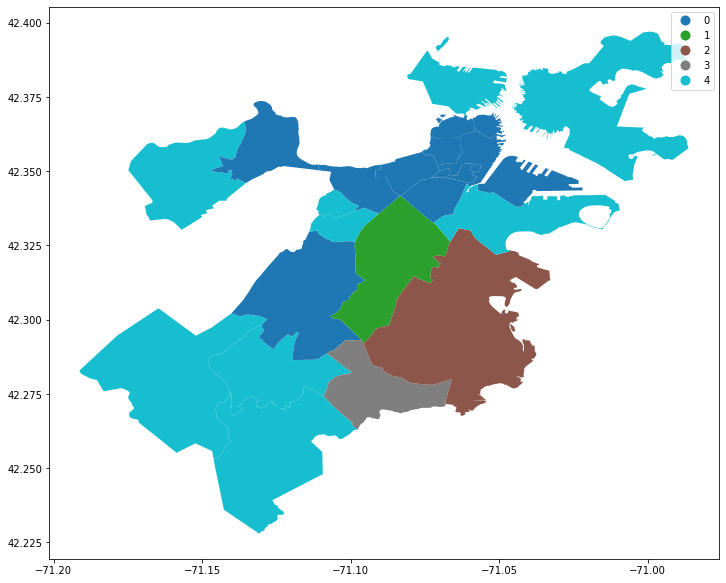

In [26]:
#now let's map bostonclusterShapes color-coded by cluster_label and overlay the parks layer
bostonclusterShapes['Cluster_Labels'] = bostonclusterShapes.Cluster_Labels.astype(str)
map2 = bostonclusterShapes['Cluster_Labels'] = bostonclusterShapes.Cluster_Labels

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, Polygon

fig, ax = plt.subplots(1,figsize=(12,12))
bostonclusterShapes.plot(column='Cluster_Labels', ax=ax, legend=True)

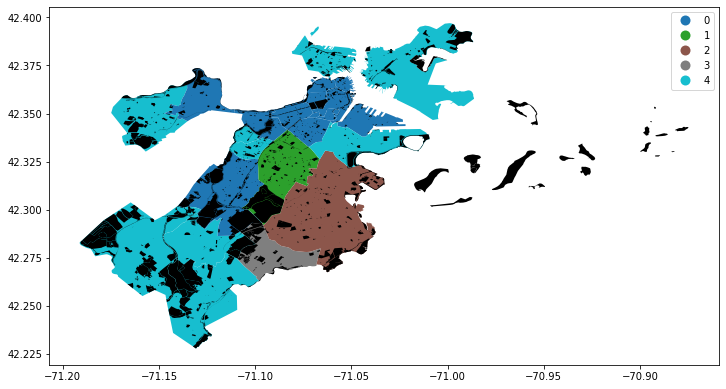

In [27]:
#and add the parks in black as an overlay
#now let's map bostonclusterShapes color-coded by cluster_label and overlay the parks layer

map3 = bostonclusterShapes['Cluster_Labels'] = bostonclusterShapes.Cluster_Labels

fig, ax = plt.subplots(1,figsize=(12,12))
bostonclusterShapes.plot(column='Cluster_Labels', ax=ax, legend=True)
parks.plot(ax=ax, color = 'black')

In [28]:
#let's examine the clusters in the next few cells

#cluster 0
bostonclusters.loc[bostonclusters['Cluster_Labels'] == 0, 
                     bostonclusters.columns[[1] + 
                     list(range(5, bostonclusters.shape[1]))]]


,Name,ShapeSTArea,ShapeSTLength,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Jamaica Plain,1.097379e+08,56349.937161,Jamaica Plain,42.3097,-71.1151,0,Bakery,Yoga Studio,Art Gallery,Coffee Shop,Pizza Place,Thrift / Vintage Store,Accessories Store,Pharmacy,Pet Store,Pub
4,Bay Village,1.156071e+06,4650.635493,Bay Village,42.3490,-71.0698,0,Spa,Sandwich Place,Theater,Clothing Store,Gym / Fitness Center,Wine Shop,Gym,Italian Restaurant,Gourmet Shop,Hotel
5,Leather District,6.812717e+05,3237.140537,Leather District,42.3505,-71.0579,0,Chinese Restaurant,Asian Restaurant,Bakery,Coffee Shop,Sandwich Place,Sushi Restaurant,Café,Pharmacy,Noodle House,Food Truck
6,Chinatown,3.324678e+06,9736.590413,Chinatown,42.3501,-71.0624,0,Chinese Restaurant,Asian Restaurant,Bakery,Bubble Tea Shop,Sandwich Place,Café,Coffee Shop,Performing Arts Venue,Seafood Restaurant,Restaurant
7,North End,5.527506e+06,16177.826815,North End,42.3647,-71.0542,0,Italian Restaurant,Seafood Restaurant,Pizza Place,Bakery,Park,Sandwich Place,Coffee Shop,Boutique,Harbor / Marina,Salon / Barbershop
9,South End,2.054000e+07,17912.333569,South End,42.3388,-71.0765,0,Italian Restaurant,Mediterranean Restaurant,Tapas Restaurant,Bakery,Sandwich Place,Park,Coffee Shop,Food Truck,French Restaurant,Breakfast Spot
10,Back Bay,1.739407e+07,19455.671146,Back Bay,42.3503,-71.0810,0,Coffee Shop,Clothing Store,Seafood Restaurant,Hotel,Ice Cream Shop,American Restaurant,Italian Restaurant,Bar,Sandwich Place,Pizza Place
13,West End,8.297743e+06,17728.590027,West End,42.3644,-71.0661,0,Hotel,Café,American Restaurant,Pizza Place,Bar,Museum,Donut Shop,Sandwich Place,Coffee Shop,Hotel Bar
14,Beacon Hill,8.718800e+06,14303.829017,Beacon Hill,42.3588,-71.0707,0,Italian Restaurant,Gift Shop,Park,Music Venue,French Restaurant,Breakfast Spot,Mexican Restaurant,Café,Scenic Lookout,Hotpot Restaurant
15,Downtown,1.731385e+07,34612.804441,Downtown,42.3557,-71.0572,0,Coffee Shop,American Restaurant,Sandwich Place,Historic Site,Hotel,Bakery,Burger Joint,Italian Restaurant,Steakhouse,Greek Restaurant


In [29]:
# cluster 1
bostonclusters.loc[bostonclusters['Cluster_Labels'] == 1, 
                     bostonclusters.columns[[1] + 
                     list(range(5, bostonclusters.shape[1]))]]

,Name,ShapeSTArea,ShapeSTLength,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Roxbury,9.184455e+07,49488.800485,Roxbury,42.3152,-71.0914,1,Basketball Court,Yoga Studio,Fried Chicken Joint,Food Truck,Food Court,Food,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store


In [30]:
# cluster 2
bostonclusters.loc[bostonclusters['Cluster_Labels'] == 2, 
                     bostonclusters.columns[[1] + 
                     list(range(5, bostonclusters.shape[1]))]]

,Name,ShapeSTArea,ShapeSTLength,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Dorchester,2.031142e+08,104344.034005,Dorchester,42.3016,-71.0676,2,Caribbean Restaurant,Food,Convenience Store,Food Truck,Food Court,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant


In [31]:
# cluster 3
bostonclusters.loc[bostonclusters['Cluster_Labels'] == 3, 
                     bostonclusters.columns[[1] + 
                     list(range(5, bostonclusters.shape[1]))]]

,Name,ShapeSTArea,ShapeSTLength,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Mattapan,5.889717e+07,42005.773707,Mattapan,42.2771,-71.0914,3,Park,Ice Cream Shop,Pizza Place,Dive Bar,Food,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant


In [32]:
# cluster 4
bostonclusters.loc[bostonclusters['Cluster_Labels'] == 4, 
                     bostonclusters.columns[[1] + 
                     list(range(5, bostonclusters.shape[1]))]]

,Name,ShapeSTArea,ShapeSTLength,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Roslindale,6.993827e+07,53563.912597,Roslindale,42.2832,-71.1270,4,American Restaurant,Cheese Shop,Italian Restaurant,Grocery Store,Plaza,Greek Restaurant,Pharmacy,Pub,Coffee Shop,Restaurant
2,Mission Hill,1.528312e+07,17918.724113,Mission Hill,42.3296,-71.1062,4,Metro Station,American Restaurant,Pizza Place,Hotel,Bus Station,Caribbean Restaurant,Bank,Greek Restaurant,Park,Supermarket
3,Longwood,8.215904e+06,11908.757148,Longwood,42.3358,-71.1077,4,Donut Shop,American Restaurant,Sushi Restaurant,Coffee Shop,Café,Falafel Restaurant,Pizza Place,Bus Stop,Shipping Store,Fast Food Restaurant
11,East Boston,1.313845e+08,121089.100852,East Boston,42.3702,-71.0389,4,Pizza Place,Park,Mexican Restaurant,Café,Sandwich Place,Convenience Store,Beer Store,Italian Restaurant,Gastropub,Gas Station
12,Charlestown,3.796418e+07,57509.688645,Charlestown,42.3782,-71.0602,4,Coffee Shop,Donut Shop,Liquor Store,Plaza,Tennis Court,Convenience Store,National Park,Café,Monument / Landmark,Boat or Ferry
17,Brighton,8.016788e+07,48787.519652,Brighton,42.3464,-71.1627,4,Pizza Place,Convenience Store,Park,Supplement Shop,Sushi Restaurant,Salon / Barbershop,Chinese Restaurant,Gift Shop,Restaurant,Latin American Restaurant
18,West Roxbury,1.531747e+08,66067.419838,West Roxbury,42.2798,-71.1627,4,Grocery Store,Pub,Automotive Shop,Convenience Store,Donut Shop,Gas Station,Liquor Store,Gift Shop,Salon / Barbershop,Bank
19,Hyde Park,1.275092e+08,66861.244955,Hyde Park,42.2565,-71.1241,4,Pizza Place,American Restaurant,Bar,Pharmacy,Platform,Park,Discount Store,Chinese Restaurant,Sandwich Place,Donut Shop
23,South Boston,6.272131e+07,64998.420283,South Boston,42.3379,-71.0496,4,Pizza Place,Bank,Convenience Store,Sandwich Place,Sports Bar,Bar,Coffee Shop,Liquor Store,Spa,Pub


In [33]:
#based off of the clusters, it seems like cluster 3 is the 
#cluster to model our park after, as park was listed as the 
#number 1 venue for that one neighborhood and it was 
#clustered separately from the other neighborhoods.

#on the other hand, clusters 2 and 1 indicate neighborhoods
#that may benefit from a park, as the park venue did not even 
#make the top 10 venues for those neighborhoods. In the other
#clusters, park venues made the top 10 lists for some 
#neighborhoods.

In [34]:
#now that we've identified some neighborhoods where parks would
#be beneficial, let's look at the parks in the cluster 3 
#neighborhood and find it's traits so we can inform the new park's
#design.

#cluster 3 neighborhood = "Mattapan"

#let's find all parks in the parks layer that overlap with the "Mattapan" polygon from the boston layer
#first, create new dataframe with Mattapan shape
mattapan = boston.loc[boston['Name']=='Mattapan']

#find overlapping parks and save as seperate dataframe
mattaParks = gpd.overlay(mattapan,parks,how='intersection',make_valid=True)
mattaParks

,OBJECTID_1,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea_1,ShapeSTLength_1,OBJECTID_2,SITE_NAME,OWNERSHIP,PROTECTION,TYPECODE,DISTRICT,ACRES,ADDRESS,ZonAgg,TypeLong,OS_Own_Jur,OS_Mngmnt,POS,PA,ALT_NAME,AgncyJuris,Shape_STArea__,Shape_STLength__,ShapeSTArea_2,ShapeSTLength_2,PARK_ID,REGION,geometry
0,47,Mattapan,1352.098354,12,2.11,5.889717e+07,42005.773707,8074,Walsh Playground,City of Boston,A97,3,Dorchester,6.945645,Opposite 31 Clancy Road,Residential District,"Parks, Playgrounds & Athletic Fields",BPRD,,X,X,,,0,0,3.025577e+05,2368.690310,312,PARK_Maintenance_Region 2,"POLYGON ((-71.06973 42.27789, -71.06973 42.277..."
1,47,Mattapan,1352.098354,12,2.11,5.889717e+07,42005.773707,8075,Dorchester South Burying Ground,City of Boston,Ch114S7/A97,4,Dorchester,1.942606,Opposite 2096 Dorchester Ave.,Open Space District,Cemeteries & Burying Grounds,BPRD,,X,X,,,0,0,8.420799e+04,1262.179341,091,PARK_Cemetery Maintenance Request,"POLYGON ((-71.06734 42.27818, -71.06761 42.278..."
2,47,Mattapan,1352.098354,12,2.11,5.889717e+07,42005.773707,8766,Neponset River Reservation I,Commonwealth of Massachusetts,A97/WPA/ACEC,2,Multi-District,183.320000,,Open Space District,"Parkways, Reservations & Beaches",DCR,DCR,X,X,,DCR,0,0,7.992766e+06,86728.932892,,INFO_Reallocation From Dept,"MULTIPOLYGON (((-71.08957 42.26975, -71.08958 ..."
3,47,Mattapan,1352.098354,12,2.11,5.889717e+07,42005.773707,8002,Kennedy Playground,Commonwealth of Massachusetts,A97,3,Mattapan,0.260029,,Open Space District,"Parks, Playgrounds & Athletic Fields",DCR,,X,X,Charles Plgd,,0,0,1.132708e+04,485.668205,,INFO_Reallocation From Dept,"POLYGON ((-71.09578 42.26548, -71.09620 42.265..."
4,47,Mattapan,1352.098354,12,2.11,5.889717e+07,42005.773707,8232,Kennedy Garden,Commonwealth of Massachusetts,A97,5,Mattapan,0.159632,,Open Space District,Community Gardens,DCR,,X,X,,,0,0,6.953686e+03,336.257975,,INFO_Reallocation From Dept,"POLYGON ((-71.09556 42.26566, -71.09578 42.265..."
5,47,Mattapan,1352.098354,12,2.11,5.889717e+07,42005.773707,8445,Fairlawn Green,Private,,1,Mattapan,1.150000,,Residential District,"Malls, Squares & Plazas",NULL,,N,X,,,0,0,4.998439e+04,2694.249649,,INFO_Reallocation From Dept,"MULTIPOLYGON (((-71.09918 42.27018, -71.09926 ..."
6,47,Mattapan,1352.098354,12,2.11,5.889717e+07,42005.773707,7997,Msgr. Francis A. Ryan Park,Commonwealth of Massachusetts,A97,3,Mattapan,6.141296,,Open Space District,"Parks, Playgrounds & Athletic Fields",DCR,,X,X,,,0,0,2.675196e+05,2585.464693,,INFO_Reallocation From Dept,"POLYGON ((-71.08386 42.26997, -71.08378 42.269..."
7,47,Mattapan,1352.098354,12,2.11,5.889717e+07,42005.773707,7995,Gladeside II,Private,,6,Mattapan,0.898541,,Residential District,Urban Wilds & Natural Areas,NULL,,N,,,,0,0,3.914115e+04,919.392211,,INFO_Reallocation From Dept,"POLYGON ((-71.08607 42.27190, -71.08613 42.271..."
8,47,Mattapan,1352.098354,12,2.11,5.889717e+07,42005.773707,7992,Woodhaven,City of Boston,A97,6,Mattapan,1.182371,,Residential District,Urban Wilds & Natural Areas,BCC,BPRD,X,X,,,0,0,5.325093e+04,931.480359,,PARK_Maintenance_Ground Maintenance,"POLYGON ((-71.09570 42.27177, -71.09607 42.271..."
9,47,Mattapan,1352.098354,12,2.11,5.889717e+07,42005.773707,8481,Woodhaven Street Lot,Private,,7,Mattapan,1.200000,26-36 Woodhaven Street,Residential District,Urban Wilds & Natural Areas,NULL,,N,,,,0,0,5.238602e+04,1064.308856,,INFO_Reallocation From Dept,"POLYGON ((-71.09493 42.27298, -71.09472 42.272..."


Text(0, 0.5, 'Number of Spaces')

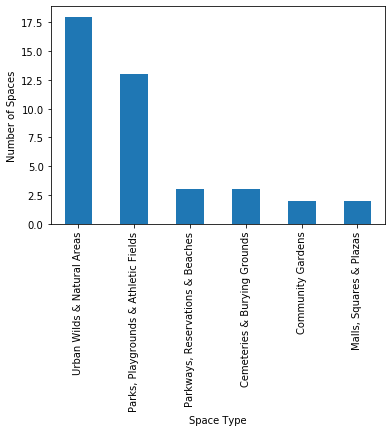

In [35]:
#let's examine the 40 parks that overlap with Mattapan 
#to inform our park design.

#First, let's look at the frequency of the open space type
spacetype = mattaParks['TypeLong'].value_counts().plot(kind='bar')
spacetype.set_xlabel('Space Type')
spacetype.set_ylabel('Number of Spaces')
#most of the spaces are urban wilds, natural areas, parks, playgrounds, & athletic fields

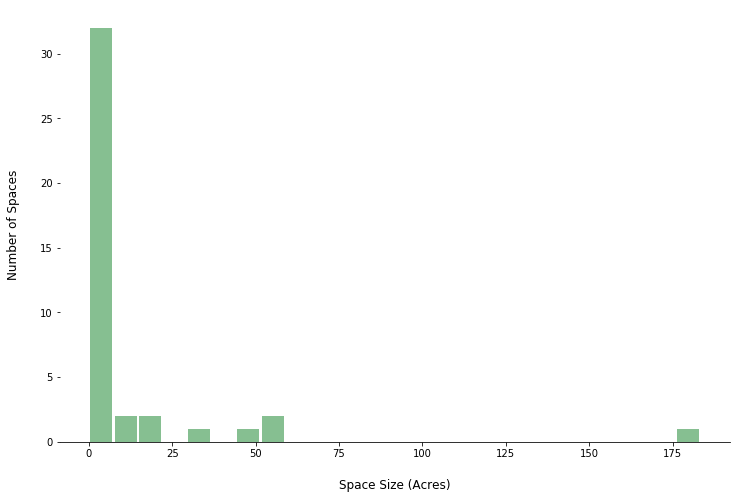

In [36]:
#let's look at the space size now
ax = mattaParks.hist(column='ACRES', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    
    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Space Size (Acres)", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Number of Spaces", labelpad=20, size=12)



Text(0, 0.5, 'Number of Spaces')

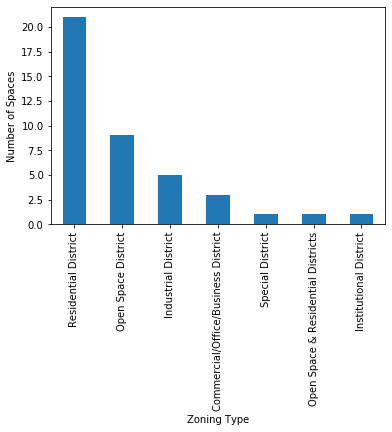

In [37]:
#let's see what kind of zoning areas the spaces are in
zonetype = mattaParks['ZonAgg'].value_counts().plot(kind='bar')
zonetype.set_xlabel('Zoning Type')
zonetype.set_ylabel('Number of Spaces')
#most of the spaces are in residential districts and open space districts

In [38]:
#At this point, it would be a good idea to check out some of these 
#spaces on google street view to include some photos of some of the 
#parks in the report to help with design. 

In [39]:
#We also need one last map showing the neighborhoods where popular
#parks exist (cluster 3) and neighborhoods that could use a 
#park (clusters 1&2)

bostonclusterShapes.loc[(bostonclusterShapes.Cluster_Labels == '3'), 'Cluster_Labels'] = 'Neighborhoods with Existing Popular Parks'
bostonclusterShapes.loc[(bostonclusterShapes.Cluster_Labels == '0'), 'Cluster_Labels'] = 'Other Neighborhoods'
bostonclusterShapes.loc[(bostonclusterShapes.Cluster_Labels == '4'), 'Cluster_Labels'] = 'Other Neighborhoods'
bostonclusterShapes.loc[(bostonclusterShapes.Cluster_Labels == '1'), 'Cluster_Labels'] = 'Potential Neighborhoods for New Park'
bostonclusterShapes.loc[(bostonclusterShapes.Cluster_Labels == '2'), 'Cluster_Labels'] = 'Potential Neighborhoods for New Park'
bostonclusterShapes

,OBJECTID_x,Name_x,Acres_x,Neighborhood_ID_x,SqMiles_x,ShapeSTArea_x,ShapeSTLength_x,geometry,OBJECTID_y,Name_y,Acres_y,Neighborhood_ID_y,SqMiles_y,ShapeSTArea_y,ShapeSTLength_y,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ...",27.0,Roslindale,1605.568237,15.0,2.51,6.993827e+07,53563.912597,Roslindale,42.2832,-71.1270,Other Neighborhoods,American Restaurant,Cheese Shop,Italian Restaurant,Grocery Store,Plaza,Greek Restaurant,Pharmacy,Pub,Coffee Shop,Restaurant
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.32610, -71.10503 42.326...",28.0,Jamaica Plain,2519.245394,11.0,3.94,1.097379e+08,56349.937161,Jamaica Plain,42.3097,-71.1151,Other Neighborhoods,Bakery,Yoga Studio,Art Gallery,Coffee Shop,Pizza Place,Thrift / Vintage Store,Accessories Store,Pharmacy,Pet Store,Pub
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.09050 42.335...",29.0,Mission Hill,350.853564,13.0,0.55,1.528312e+07,17918.724113,Mission Hill,42.3296,-71.1062,Other Neighborhoods,Metro Station,American Restaurant,Pizza Place,Hotel,Bus Station,Caribbean Restaurant,Bank,Greek Restaurant,Park,Supermarket
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33673, -71.09832 42.337...",30.0,Longwood,188.611947,28.0,0.29,8.215904e+06,11908.757148,Longwood,42.3358,-71.1077,Other Neighborhoods,Donut Shop,American Restaurant,Sushi Restaurant,Coffee Shop,Café,Falafel Restaurant,Pizza Place,Bus Stop,Shipping Store,Fast Food Restaurant
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34878, -71.06663 42.348...",31.0,Bay Village,26.539839,33.0,0.04,1.156071e+06,4650.635493,Bay Village,42.3490,-71.0698,Other Neighborhoods,Spa,Sandwich Place,Theater,Clothing Store,Gym / Fitness Center,Wine Shop,Gym,Italian Restaurant,Gourmet Shop,Hotel
5,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,"POLYGON ((-71.05838 42.34983, -71.05834 42.349...",32.0,Leather District,15.639908,27.0,0.02,6.812717e+05,3237.140537,Leather District,42.3505,-71.0579,Other Neighborhoods,Chinese Restaurant,Asian Restaurant,Bakery,Coffee Shop,Sandwich Place,Sushi Restaurant,Café,Pharmacy,Noodle House,Food Truck
6,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.05791 42.35238, -71.05811 42.352...",33.0,Chinatown,76.324410,26.0,0.12,3.324678e+06,9736.590413,Chinatown,42.3501,-71.0624,Other Neighborhoods,Chinese Restaurant,Asian Restaurant,Bakery,Bubble Tea Shop,Sandwich Place,Café,Coffee Shop,Performing Arts Venue,Seafood Restaurant,Restaurant
7,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((-71.05200 42.36884, -71.05219 42.368...",34.0,North End,126.910439,14.0,0.20,5.527506e+06,16177.826815,North End,42.3647,-71.0542,Other Neighborhoods,Italian Restaurant,Seafood Restaurant,Pizza Place,Bakery,Park,Sandwich Place,Coffee Shop,Boutique,Harbor / Marina,Salon / Barbershop
8,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,"POLYGON ((-71.09646 42.29323, -71.09633 42.293...",35.0,Roxbury,2108.469072,16.0,3.29,9.184455e+07,49488.800485,Roxbury,42.3152,-71.0914,Potential Neighborhoods for New Park,Basketball Court,Yoga Studio,Fried Chicken Joint,Food Truck,Food Court,Food,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
9,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569,"POLYGON ((-71.06834 42.34775, -71.06913 42.347...",36.0,South End,471.535356,32.0,0.74,2.054000e+07,17912.333569,South End,42.3388,-71.0765,Other Neighborhoods,Italian Restaurant,Mediterranean Restaurant,Tapas Restaurant,Bakery,Sandwich Place,Park,Coffee Shop,Food Truck,French 

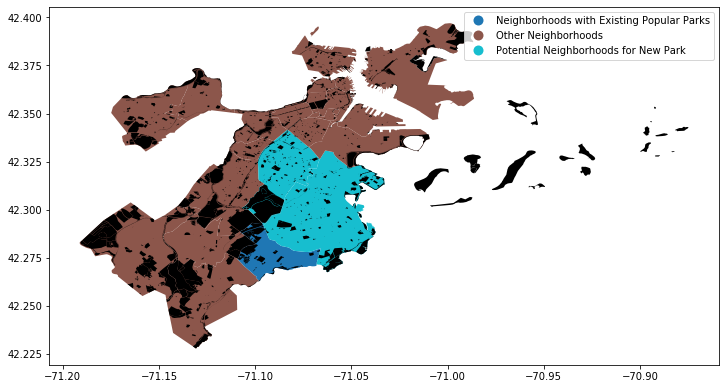

In [40]:
#now make the map with the updated geotable
map4 = bostonclusterShapes['Cluster_Labels'] = bostonclusterShapes.Cluster_Labels

fig, ax = plt.subplots(1,figsize=(12,12))
bostonclusterShapes.plot(column='Cluster_Labels', ax=ax, legend=True)
parks.plot(ax=ax, color = 'black')